In [5]:
function differential(N,dx)
    [if j==i+1
        1.0/(2*dx)
    elseif j==i-1
        -1.0/(2*dx)
    else 
        0.0
    end
    for i in 0:N, j in 0:N ];
end

function laplacian(N,dx) 
    Float64[   
        if abs(i-j)==1 || abs(i-j)==N
            1.0/dx^2
        elseif i==j
            -2.0/dx^2
        else 
            0.0
        end
        for i in 0:N, j in 0:N 
    ];
end

function wave_packet(x0,σ,k0,N,dx)
    Complex{Float64}[ sqrt(sqrt(1/(π*σ^2)))*exp(-(n*dx-x0)^2/(2*σ^2)+im*k0*(n*dx-x0)) for n in 0:N];
end

wave_packet (generic function with 1 method)


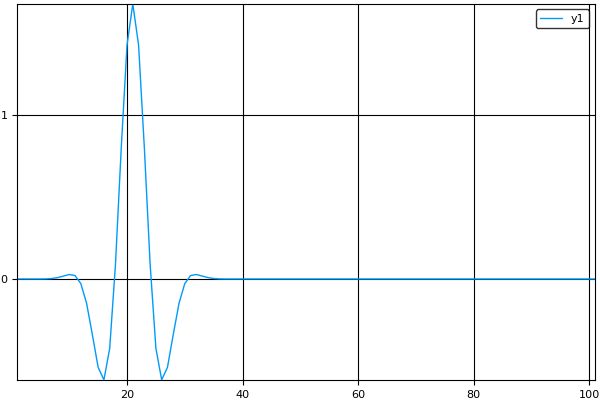

In [19]:
using Plots
plot(real(wave_packet(1,0.2,10,100,0.05)))

In [12]:
# free particle

L = 4;
N = 200;
dx = L/N;

V = [0.0 for n in 0:N];

H = -0.5*laplacian(N,dx) + diagm(V);

psi_0 = wave_packet(1,0.1,20,N,dx);

In [13]:
using Plots
Nt = 80;
T = 0.1; # T = L/k0 = 0.1
pyplot(leg=false, ticks=nothing)
x_domain = linspace(0, L, N+1)
t_domain = linspace(0, T, Nt)

@gif for t in t_domain
    psi_t = expm(-im*t*H)*psi_0; # time evolution op on wave packet
    
    plot(x_domain, [real(psi_t) imag(psi_t)],ylim=(-5,5), grid=false)
end

INFO: Saved animation to /home/mateus/latex/exercises/vorlesung/tmp.gif


Plots.AnimatedGif("/home/mateus/latex/exercises/vorlesung/tmp.gif")

In [27]:
# barrier 

L = 4;
N = 400;
dx = L/N;

V = [   
    if n*dx <= 2
        0.0 
    else
        150.0  # V_0 in die Nähe von E = k^2/2 = 50
    end
    for n in 0:N
        ]; 

H = -0.5*laplacian(N,dx)+diagm(V);

psi_0 = wave_packet(1.9,0.05,10,N,dx);

In [28]:
using Plots
Nt = 160;
T = 0.1; 
pyplot(leg=false, ticks=nothing)
x_domain = linspace(0, L, N+1)
t_domain = linspace(0, T, Nt)

@gif for t in t_domain
    psi_t = abs2(expm(-im*t*H)*psi_0); # time evolution op on wave packet
    
    plot(x_domain, [psi_t V/100], ylim=(0,10),grid=false)
end

INFO: Saved animation to /home/mateus/latex/exercises/vorlesung/tmp.gif


Plots.AnimatedGif("/home/mateus/latex/exercises/vorlesung/tmp.gif")

In [31]:
# tunneleffekt

L = 2;
N = 400;
dx = L/N;

V = [   
    if n*dx <= 1 || n*dx >= 1.1
        0.0 
    else
        900.0 # V_0 on the order of E = k^2/2 = 800
    end
    for n in 0:N];

H = -0.5*laplacian(N,dx)+diagm(V);

psi_0 = wave_packet(0.5,0.1,40,N,dx);

In [32]:
using Plots
Nt = 160;
T = 0.05; 
pyplot(leg=false, ticks=nothing)
x_domain = linspace(0, L, N+1)
t_domain = linspace(0, T, Nt)

@gif for t in t_domain
    psi_t = abs2(expm(-im*t*H)*psi_0); # time evolution op on wave packet
    
    plot(x_domain, [psi_t V/100], ylim=(0,10),grid=false)
end

INFO: Saved animation to /home/mateus/latex/exercises/vorlesung/tmp.gif


Plots.AnimatedGif("/home/mateus/latex/exercises/vorlesung/tmp.gif")

In [39]:
# harmonic oscillator

L = 4;
N = 200;
dx = L/N;


V = Float64[312.5*(n*dx-L/2)^2 for n in 0:N]; # mω^2(x-x0)^2/2 für  ω = 25

H = -0.5*laplacian(N,dx)+diagm(V);

#Koheränter Zustand (1/sqrt(sqrt(π/ω))) exp(-(x-x0)^2/(2/ω)) also σ=1/sqrt(ω) = 0.2

psi_0 = wave_packet(L/2,0.4,10,N,dx); 

In [43]:
using Plots
Nt = 80;
T = 2*pi/25;
pyplot(leg=false, ticks=nothing)
x_domain = linspace(0, L, N+1)
t_domain = linspace(0, T, Nt)

@gif for t in t_domain
    psi_t = abs2(expm(-im*t*H)*psi_0); # time evolution op on wave packet
    
    plot(x_domain, [psi_t V/300], ylim=(-5,5),grid=false)
end

INFO: Saved animation to /home/mateus/latex/exercises/vorlesung/tmp.gif


Plots.AnimatedGif("/home/mateus/latex/exercises/vorlesung/tmp.gif")